# (추가자료) Testing in Python
DS<sup>2</sup> Probability, Statistics and Bayesian Statistics

이번 자료는 Python에서 통계적 가설검정을 하는 방법에 대해 다루어보도록 하겠습니다.

In [5]:
import sys
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm, t, chi2, binom
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scienceplots

plt.style.use('science')

print(f'Running python ver. : {sys.version}')
print(f'Running numpy ver. : {np.__version__}')
print(f'Running scipy ver. : {scipy.__version__}')
print(f'Running statsmodels ver. : {sm.__version__}')

Running python ver. : 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
Running numpy ver. : 1.26.4


NameError: name 'scipy' is not defined

## Mean, standard deviation

- `np.array` 객체에 대해, `mean`과 `std` 메소드를 사용하여 평균과 표준편차를 구할 수 있습니다.
- `ddof` 인자를 사용하여 표본표준편차를 구할 수 있습니다. (기본값은 0)

In [63]:
sample = [1,2,2,4,5,6]

# Mean
print(f'Mean : {np.mean(sample)}')

# Median
print(f'Median : {np.median(sample)}')

# Mode
print(f'Mode : {stats.mode(sample)}')

Mean : 3.3333333333333335
Median : 3.0
Mode : ModeResult(mode=2, count=2)


In [66]:
# Variance

print(f'Variance : {np.var(sample)}') # default ddof=0
print(f'Variance : {np.var(sample, ddof=1)}')

Variance : 3.2222222222222228
Variance : 3.866666666666667


In [67]:
# Note in pandas, ddof=1 by default
import pandas as pd

print(f'Variance : {pd.Series(sample).var()}')

Variance : 3.866666666666667


## Random variable

- `scipy.stats` 모듈의 클래스 `norm, t, f, chi2` 등을 사용하여 확률분포를 생성할 수 있습니다.

In [13]:
# Normal variable

X = norm(loc=10, scale=3)

In [15]:
print(X) # rv_continuous object

`.rvs()` 메소드를 사용하여 확률분포로부터 난수를 생성할 수 있습니다.

In [20]:
# Generate random samples

x = X.rvs(size=1000)
x[:10]

array([ 9.16220138,  8.05732738, 10.69961182,  8.1066554 ,  8.53923909,
        8.6474042 , 11.41339434,  9.69055128,  4.45377966, 11.96700478])

`.pdf()`, `.cdf()`, `.ppf()` 메소드를 사용하여 확률밀도함수, 누적분포함수, 분위수를 계산할 수 있습니다.

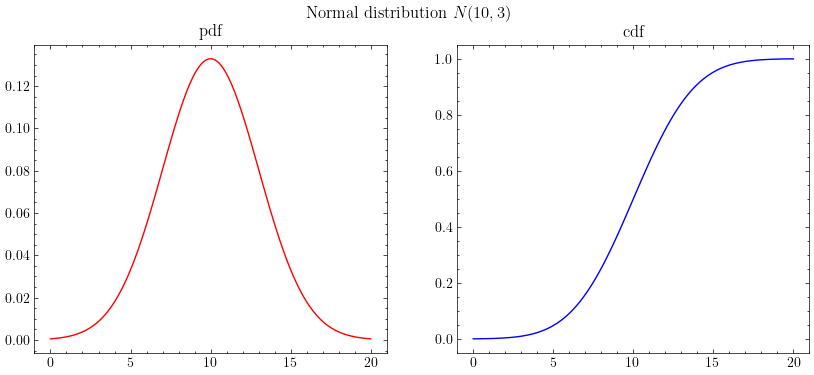

In [33]:
# pdf, cdf

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

x = np.linspace(0, 20, 100)
pdf = X.pdf(x)
cdf = X.cdf(x)


axes[0].plot(x, pdf, 'r')
axes[0].set_title('pdf')
axes[1].plot(x, cdf, 'b')
axes[1].set_title('cdf')
fig.suptitle('Normal distribution $N(10, 3)$')
plt.show()

In [36]:
# ppf (percent point function)
## ex. P(X <= x) = 0.95

p = 0.95

norm(loc=0, scale=1).ppf(p)

1.644853626951472

## Testing

### 정규분포의 모평균에 대한 검정

한 제약회사에서 생산하고 있는 진통제는 복용 후 진통효과가 나타날 때까지의 시간이 평균 30분, 표준편차 5분의 정규분포를 따르는 것으로 알려져 있다. 이 제약회사의 연구원들은 새로운 진통제를 개발하고 그 진통효과가 기존의 제품보다 빨리 나타난다고 주장한다. 이 회사의 경영진은 이들의 주장을 확인하기 위하여 10명의 환자를 랜덤하게 추출하여 새로운 진통제를 복용시킨 후에 진통 효과가 나타나는 시간을 측정하였다.이러한 조사에서 새로운 진통제의 진통효과가 더 빠르다는 증거가 뚜렷하다고 판단되면 생산공정을 변경하여 새로운 진통제를 양산하려고 한다.관측된 샘플 $X_1,\ldots,X_{10}$이 다음과 같을 때, 유의수준 5\%에서 가설검정을 하시오.

In [2]:
import numpy as np

samples = [25, 25.5, 31, 25, 29.5, 28.5, 28, 26, 26, 30.5]
print(np.mean(samples))

27.5


In [3]:
# Z-test

mu = 30
sd = 5

test_stat = (np.mean(samples) - mu) / (sd / np.sqrt(len(samples)))
print(f'test_stat = {test_stat}')

test_stat = -1.5811388300841898


In [4]:
# Critical value

alpha = 0.05
z_alpha = norm(loc=0, scale=1).ppf(alpha)
print(f'z_alpha = {z_alpha}')

NameError: name 'norm' is not defined

In [57]:
# p-value

p_value = norm(loc=0, scale=1).cdf(test_stat)
print(f'p_value = {p_value}')

p_value = 0.056923149003329024


### 정규분포의 모평균에 대한 검정 (2)

한 제약회사에서 생산하고 있는 진통제는 복용 후 진통효과가 나타날 때까지의 시간이 평균 **30**분인 정규분포를 따르는 것으로 알려져 있다. 이 제약회사의 연구원들은 새로운 진통제를 개발하고 그 진통효과가 기존의 제품보다 빨리 나타난다고 주장한다. 이 회사의 경영진은 이들의 주장을 확인하기 위하여 100명의 환자를 랜덤하게 추출하여 새로운 진통제를 복용시킨 후에 진통 효과가 나타나는 시간을 측정하였다.이러한 조사에서 새로운 진통제의 진통효과가 더 빠르다는 증거가 뚜렷하다고 판단되면 생산공정을 변경하여 새로운 진통제를 양산하려고 한다.관측된 샘플 $X_1,\ldots,X_{10}$이 다음과 같을 때, 유의수준 5\%에서 가설검정을 하시오.

In [61]:
samples = [25, 25.5, 31, 25, 29.5, 28.5, 28, 26, 26, 30.5]
print(np.mean(samples))

27.5


In [71]:
# Test statistic

mu = 30
test_stat = (np.mean(samples) - mu) / (np.std(samples, ddof=1) / np.sqrt(len(samples)))
print(f'test_stat = {test_stat}')

# Critical value

alpha = 0.05
t_alpha = t(df=len(samples)-1).ppf(alpha)
print(f't_alpha = {t_alpha}')

# p-value

p_value = t(df=len(samples)-1).cdf(test_stat)
print(f'p_value = {p_value}')

test_stat = -3.4412360080584263
t_alpha = -1.8331129326536337
p_value = 0.003688048566046467


In [75]:
# Use scipy.stats

t_stat, p_value = scipy.stats.ttest_1samp(samples, mu, alternative='less')

print(f't_stat = {t_stat}')
print(f'p_value = {p_value}')

t_stat = -3.4412360080584263
p_value = 0.003688048566046467


### 정규분포의 모분산에 대한 검정

플라스틱판을 생산하는 한 공장이 있다. 판 두께의 표준편차가 1.5mm를 상회하면 공정에 이상이 있는 것으로 간주한다. 어느 날 10개의 판을 랜덤추출하여 두께를 측정한 결과가 다음과 같았다.
$$226, 228, 226, 225, 232, 228, 227, 229, 225, 230$$

과거의 공정관리 기록에 의하면, 이러한 판 두께의 분포는 정규분포라고 해도 무방할때, 공정에 이상이 있는가를 유의수준 5%에서 검정하여라.

In [77]:
samples = [226, 228, 226, 225, 232, 228, 227, 229, 225, 230]
print(np.mean(samples))

227.6


In [89]:
# Chi2 test statistic
s2 = np.var(samples, ddof=1)
n = len(samples)

test_stat = (n-1) * s2 / 1.5**2
print(f'test_stat = {test_stat}')

# Critical value

alpha = 0.95
chi2_alpha = chi2(df=n-1).ppf(alpha)
print(f'chi2_alpha = {chi2_alpha}')

# p-value

p_value = 1- chi2(df=n-1).cdf(test_stat)
print(f'p_value = {p_value}')

test_stat = 20.62222222222222
chi2_alpha = 16.918977604620444
p_value = 0.014437644082268442


# 기타 검정
- 두 모집단의 평균에 대한 검정 : `ttest_ind`
- 두 모집단의 분산에 대한 검정 : `levene', 'bartlett`

In [93]:
# Ex.

sample1 = [226, 228, 226, 225, 232, 228, 227, 229, 225, 230]
sample2 = [225, 226, 227, 228, 229, 230, 231, 232, 233, 234]

print(np.mean(sample1))
print(np.mean(sample2))

227.6
229.5


In [96]:
# Equal variance

scipy.stats.levene(sample1, sample2) # p-value > 0.05 : equal variance

LeveneResult(statistic=1.2932551319648091, pvalue=0.27036159319492853)

In [97]:
# t-test

scipy.stats.ttest_ind(sample1, sample2, equal_var=True)

TtestResult(statistic=-1.5876267107027602, pvalue=0.12978121566134176, df=18.0)